In [1]:
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[3]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [3]:
%%time
'''
induce a grammar and train an estimator
'''
from graphlearn.graphlearn import GraphLearnSampler
training_graphs = get_graphs(dataset_fname, size=300)
sampler=GraphLearnSampler(radius_list=[0],thickness_list=[3],
                          min_cip_count=2, min_interface_count=2)
sampler.fit(training_graphs,n_jobs=-1,batch_size=10)

print('graph grammar stats:')
n_instances, n_interfaces, n_cores, n_cips = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances,
                                                                                     n_interfaces,
                                                                                     n_cores,
                                                                                     n_cips))

graph grammar stats:
#instances: 300   #interfaces: 20   #cores: 7   #core-interface-pairs: 51
CPU times: user 9.5 s, sys: 1.59 s, total: 11.1 s
Wall time: 20.3 s


interface id: 593013 [34 options]


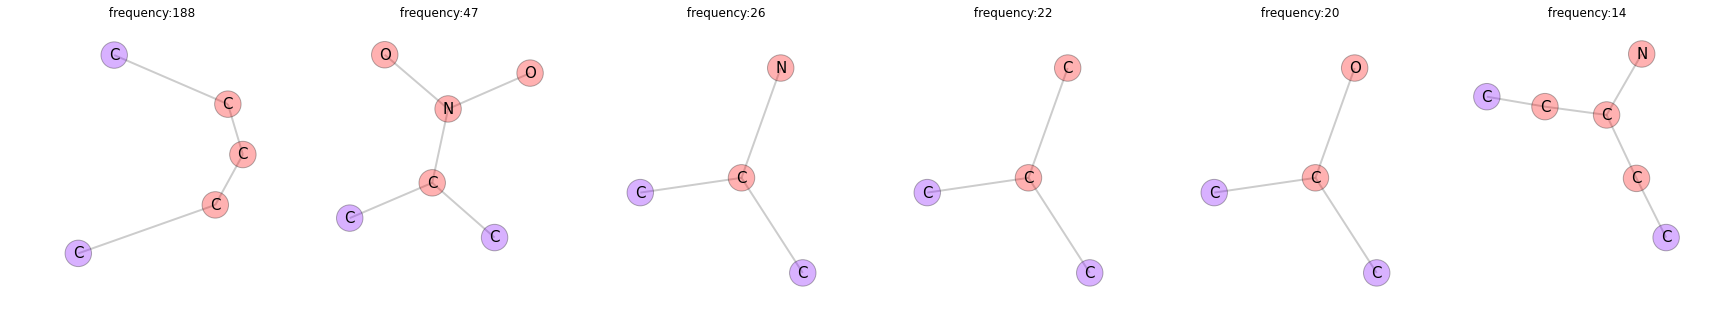

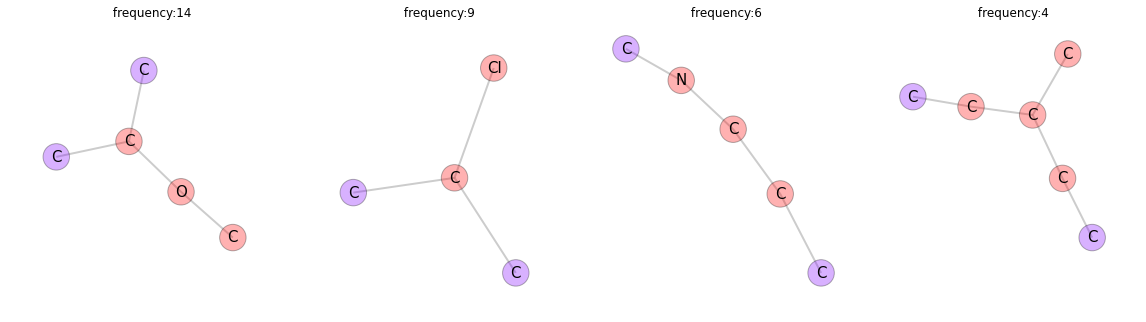

interface id: 755701 [29 options]


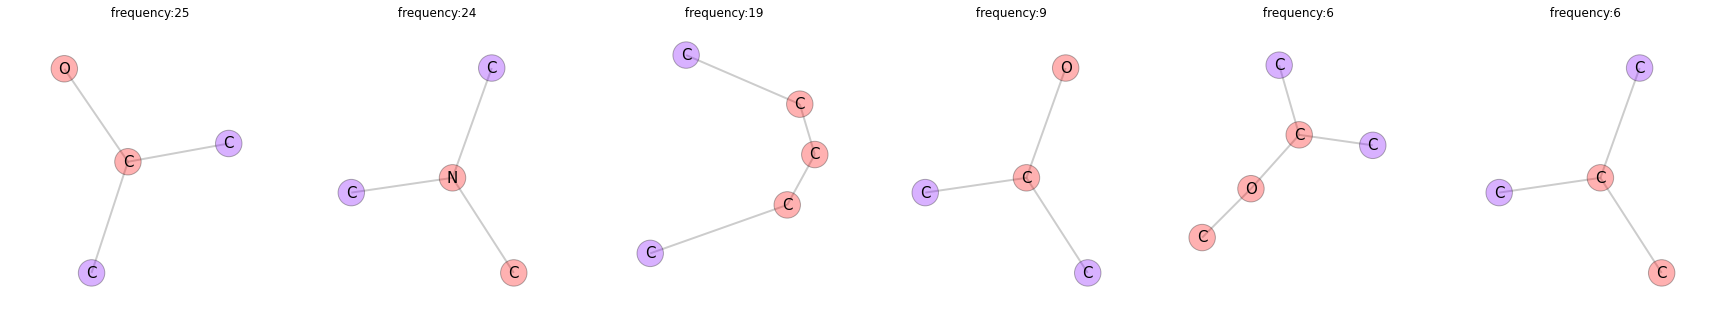

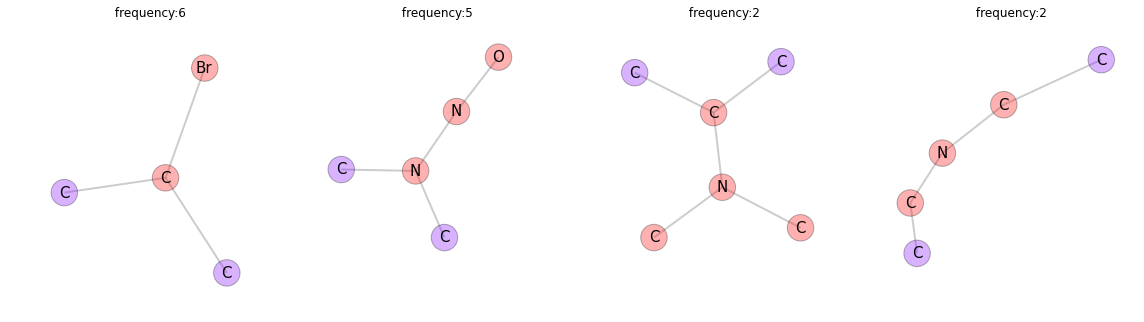

interface id: 1003290 [22 options]


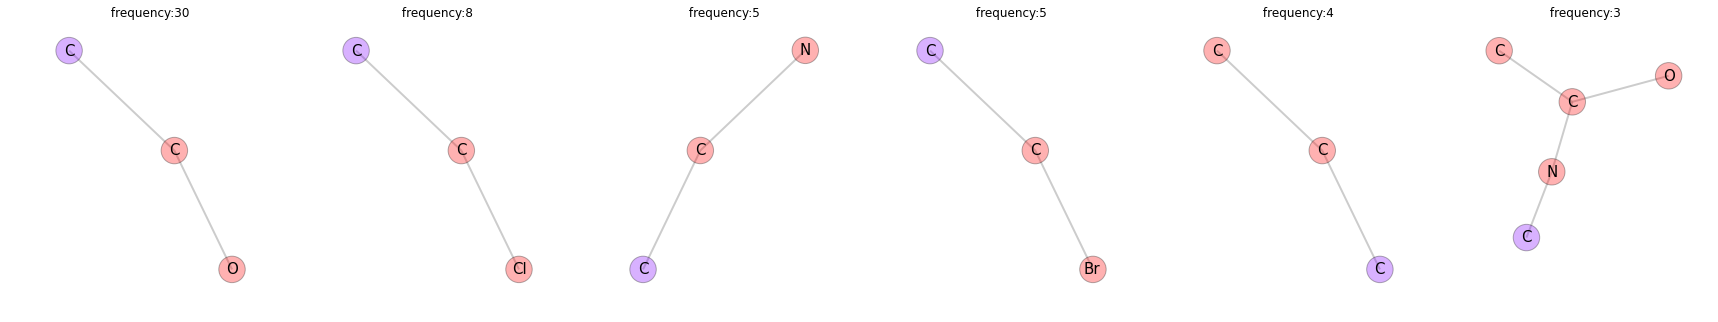

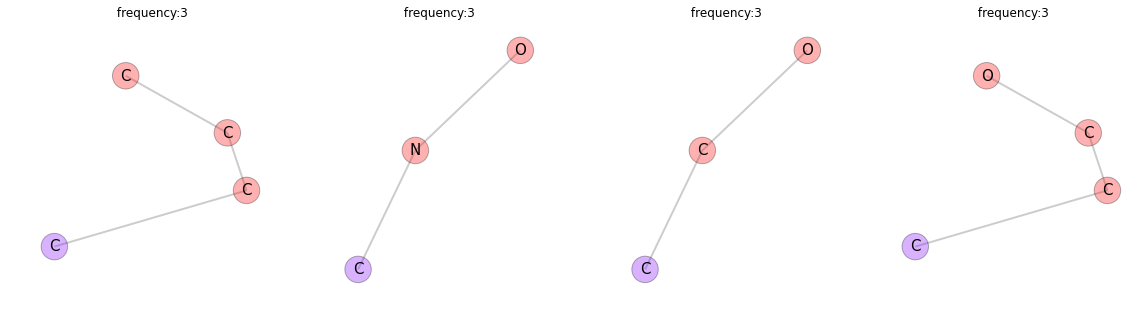

interface id: 675404 [21 options]


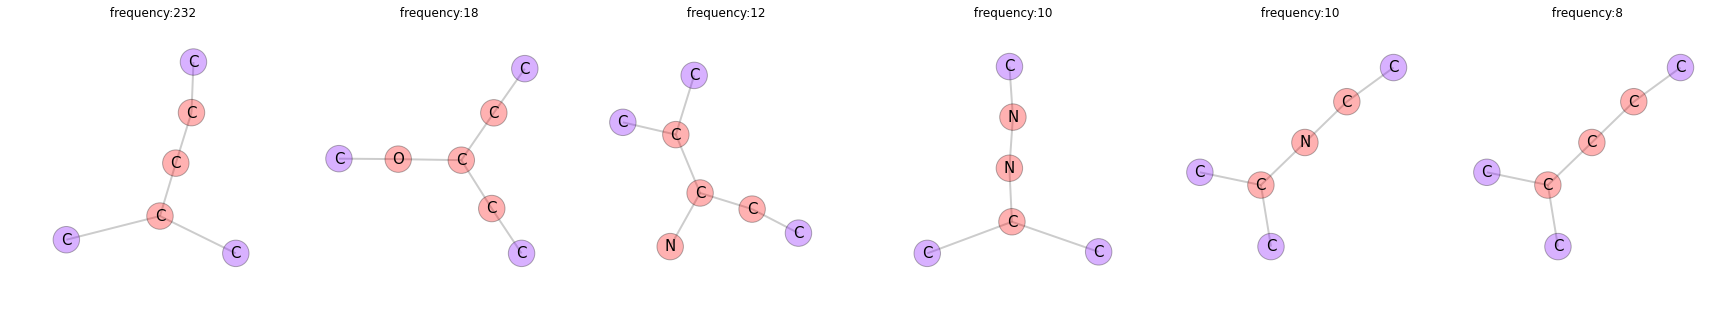

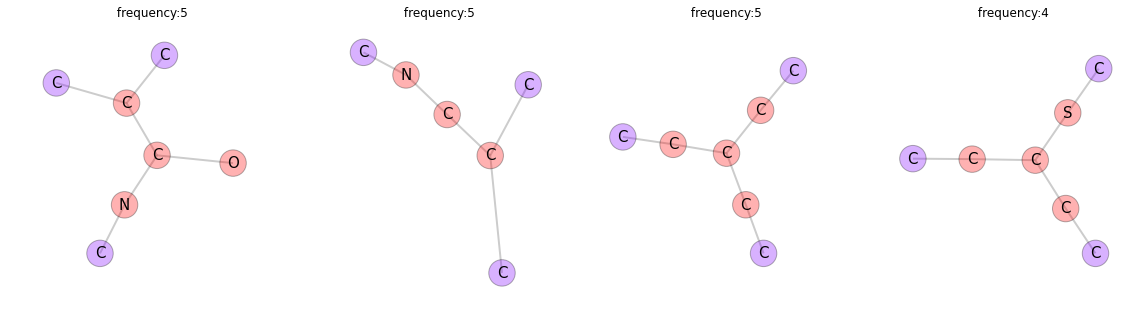

interface id: 115660 [15 options]


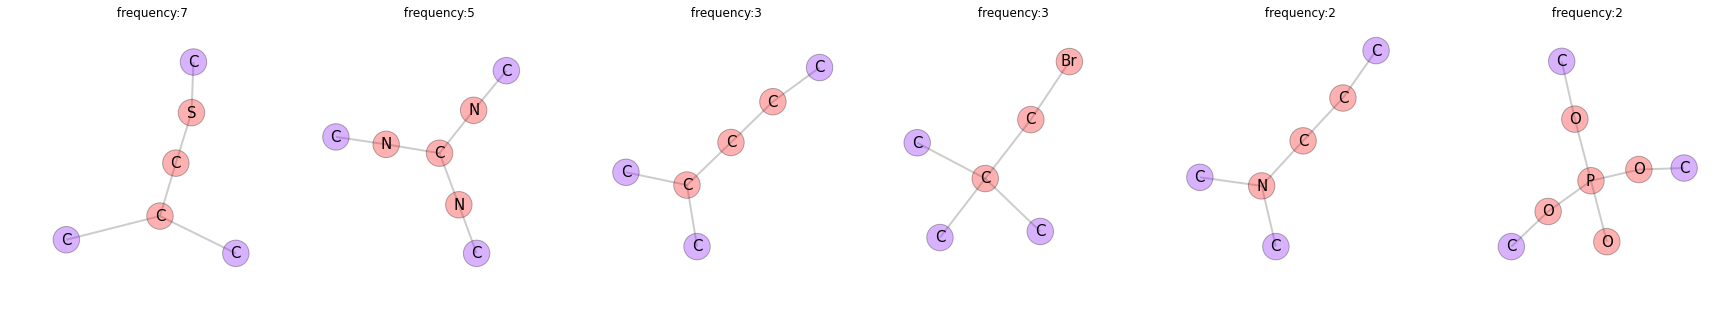

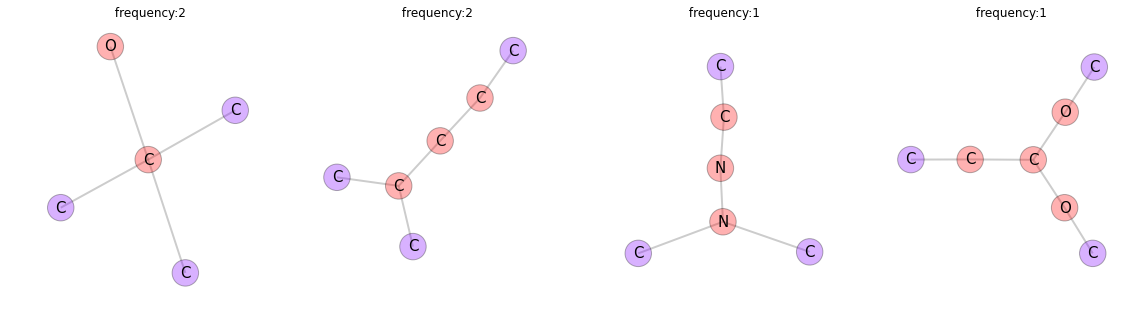

interface id: 658252 [12 options]


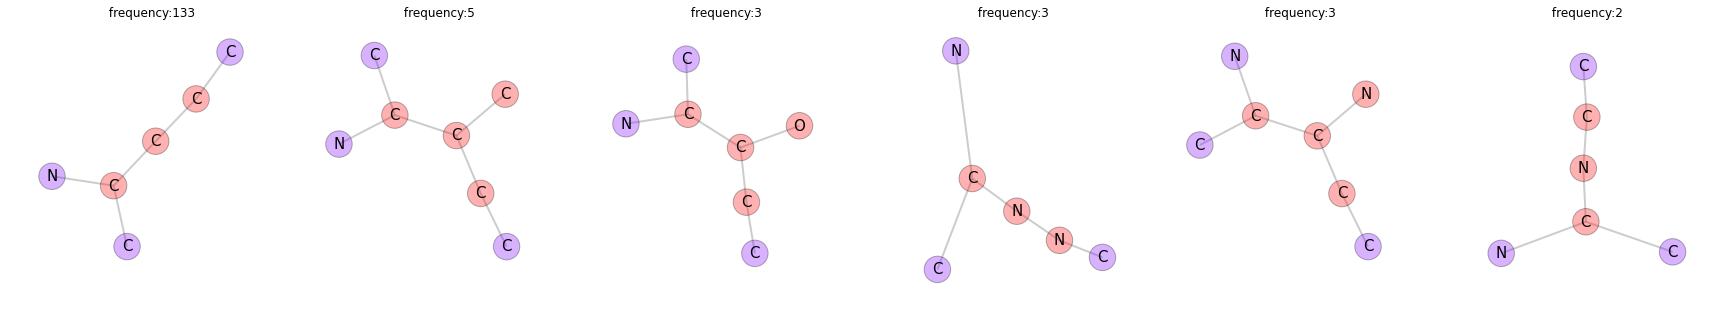

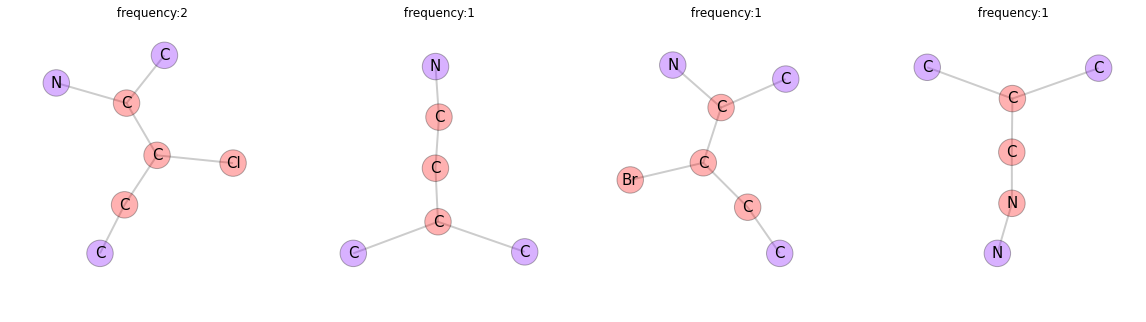

In [10]:
#draw production rules
from graphlearn.utils.draw import draw_grammar
draw_grammar(sampler.grammar().productions, contract=True,
             n_productions=6,n_graphs_per_line=6, 
             size=5, colormap='rainbow', node_border=1, vertex_alpha=0.3, edge_alpha=0.2, node_size=700)

how often do we see interface hashes
# productions: 51
x = # interfaces (total: 20)
y=number of cores(ihash), y=sum Of Core Counts(ihash)


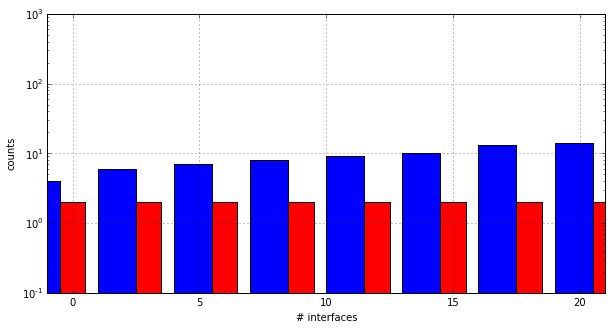

how often was this corehash seen?
x = # cores (total: 7)
y = in Y interfaces(chash), y= sum Of Count Over All Interfaces(chash)


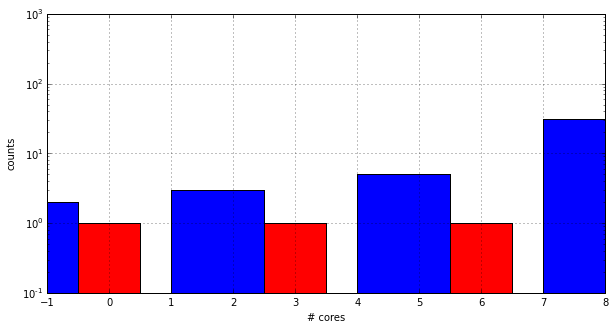

histogram
# productions: 51
distinct cores: 7 (seen on x axis)
interfaces with x many cores were observed y many times. 


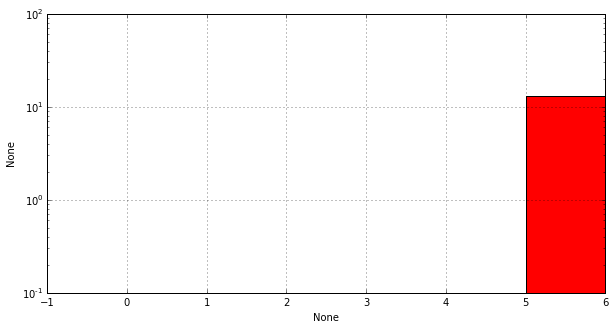

other histogram
how many cores exist with x many interfaces


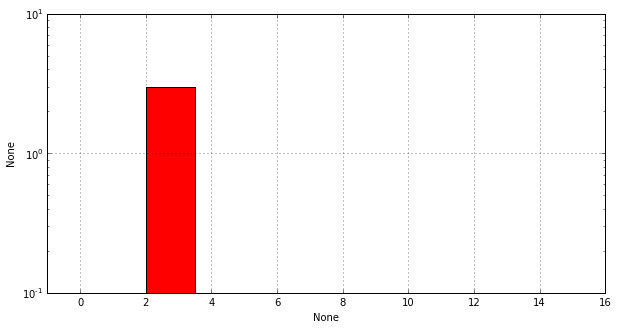

In [5]:
#grammar statistics
from graphlearn.utils.draw import draw_grammar_stats
draw_grammar_stats(sampler.grammar().productions, size=(10,5))

In [6]:
%%time
#analyse grammar size under different parameters
from graphlearn.graphlearn import GraphLearnSampler
from itertools import tee

for radius in range(1,4):
    for thickness in range(1,4):
        print 'Radius: %d   Thickness: %d' % (radius, thickness)
        for size in range(100,1000,100):
            training_graphs = get_graphs(dataset_fname, size=size)
            training_graphs,training_graphs_=tee(training_graphs)

            sampler=GraphLearnSampler(radius_list=[radius],
                                      thickness_list=[thickness],
                                      min_cip_count=2, 
                                      min_interface_count=2,
                                      random_state=42)

            sampler.fit(training_graphs_,n_jobs=-1,batch_size=10)

            n_instances, n_interfaces, n_cores, n_cips = sampler.grammar().size()
            print('#instances: %3d   #interfaces: %4d   #cores: %4d   #core-interface-pairs: %5d' % (n_instances,
                                                                                                 n_interfaces,
                                                                                                 n_cores,
                                                                                                 n_cips))

Radius: 1   Thickness: 1
#instances: 100   #interfaces:   41   #cores:   47   #core-interface-pairs:   170
#instances: 200   #interfaces:   61   #cores:   64   #core-interface-pairs:   285


/Library/Python/2.7/site-packages/sklearn/calibration.py:398: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/Library/Python/2.7/site-packages/sklearn/calibration.py:408: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/Library/Python/2.7/site-packages/sklearn/calibration.py:410: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


#instances: 300   #interfaces:   75   #cores:   75   #core-interface-pairs:   352
#instances: 400   #interfaces:   86   #cores:   85   #core-interface-pairs:   428


KeyboardInterrupt: 

.